# Young Adult Migration Pattern Dataset <a href="https://www.utm.my" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group Members

|    Name           |           Matric Number       |                      
|-------------------|-------------------------------|
|Muhammad Fikri Bin Sharunazim    | A21EC0075       |
|Muhammad Farhan Bin Ibrahim|        A21EC0072      |
|Muhammad Adam Fahmi Bin Mohd Taufiq |A21EC0061|
|Mikhail Bin Yassin |A21EC0053                      |

---
#About Dataset
**Young Adult Migration Pattern Dataset**

How far do people migrate between childhood and young adulthood? Where do they go? How much does one's location during childhood determine the labor markets that one is exposed to in young adulthood?

This project sheds light on these questions using newly constructed and publicly available statistics on the migration patterns of young adults in the United States. Use this resource to discover where people in your hometown moved as young adults.

Researchers at Harvard University and the Census Bureau have linked federal tax filings, Census records, and other government data to track the migration patterns of young US residents. Specifically, for each person born in the US between 1984 and 1992, the researchers compared where they lived at age 16 to where they lived at age 26. The project’s public dataset counts the approximate number who moved to/from each pair of commuting zones — overall and disaggregated by race/ethnicity and parental income level.

-------------------------------------------------------------------------

##Migration Patterns Data Dictionary

###Data Files:

• od_pooled.csv – Dataset contains count and fractions of people who move between each
origin and destination (OD) commuting zone pair. These data are unique at the OD level. The variable pool takes the value “pooled”.

• od_race.csv – Dataset contains count and fractions of people who move between each OD commuting zone pair separately by race/ethnicity. These data are unique at the OD x race level. The variable pool takes the values “Asian”, “Black”, “Hispanic”, “White”, and “Other”. Note that “Other” includes not only other races but also people who are not linked to the Decennial Census or ACS.

• od_inc.csv – Dataset contains count and fractions of people who move between each origin and destination commuting zone pair separately by parental income quintile. These data are unique at the OD x income quintile level. The variable pool takes the values “Q1” (poorest parental income quintile), …, “Q5” (richest parental income quintile).

• od.csv – Dataset contains count and fractions of people who move between each origin and destination commuting zone pair separately by race/ethnicity and parental income quintile. These data are unique at the OD x race/ethnicity x parental income level. The variable pool takes the values of the pairwise combinations of race (“Asian”, “Black”,
“Hispanic”, “White”, and “Other”) and parental income quintile (“Q1” - “Q5”). Note that the “Other” race/ethnicity category includes not only other races but also people who are not linked to the Decennial Census or ACS.



###Geographic variables:

• `o_cz`: The numeric identifier of the commuting zone (CZ) in which the individual resided in childhood/at age 16 (referred to as origin CZ hereafter).

• `o_cz_name`: The name of the origin CZ.

• `o_state_name`: The name of the state the origin CZ is in.

• `d_cz`: The numeric identifier of the CZ in which the individual resides in young adulthood/at age 26 (referred to as destination CZ hereafter).

• `d_cz_name`: The name of the destination CZ.

• `d_state_name`: The name of the state the destination CZ is in.


###Migration variables:

• `n`: The number of individuals from origin o living in destination d.

• `n_tot_o`: Total number of individuals from origin o. Generated by summing n across d_cz cells for each o_cz.

• `n_tot_d`: Total number of individuals who live in destination d. Generated by summing n across o_cz for each d_cz.

• `pr_d_o`: Pr{D|O}. The probability an individual lives in destination d given they grew up in origin o. Generated as n/n_tot_o.

• `pr_o_d`: Pr{O|D}. The probability an individual is from origin o given they live in destination d. Generated as n/n_tot_d.




We start by importing all the necessary packages and modules

In [1]:
!pip install modin[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 96.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7

In [2]:
! pip install --upgrade modin
! pip install --upgrade matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 23.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [3]:
# ****** Do not change the code in this cell! It verifies that the notebook is being run correctly! ******

def verify_and_print_times(pandas_time, modin_time):
    if modin_time < pandas_time:
        print(f"Modin was {pandas_time / modin_time:.2f}X faster than stock pandas!")
        return
    print(
        f"Oops, stock pandas appears to be {modin_time / pandas_time:.2f}X faster than Modin in this case. "
        "This is unlikely but could happen sometimes on certain machines/environments/datasets. "
        "One of the most probable reasons is the excessive amount of partitions being assigned to a single worker. "
        "You may visit Modin's optimization guide in order to learn more about such cases and how to fix them: "
        "\nhttps://modin.readthedocs.io/en/latest/usage_guide/optimization_notes/index.html\n\n"
        "But first, verify that you're using the latest Modin version, also, try to use different executions, "
        "for basic usage we recommend non-experimental 'PandasOnRay'.\n"
        "Current configuration is:"
    )
    try:
        from modin.utils import get_current_execution

        execution = get_current_execution()
    except ImportError:
        # for modin version < 0.12.0
        try:
            from modin.utils import get_current_backend

            execution = get_current_backend()
        except ImportError:
            # for modin versions < 0.8.1
            execution = (
                "Can't deduce the current execution, your Modin version is too old!"
            )
    print(f"\tExecution: {execution}")
    try:
        import modin.config as cfg

        print(
            f"\tIs experimental: {cfg.IsExperimental.get()}\n"
            f"\tNumber of CPUs to utilize by Modin (check that Modin uses all CPUs on your machine): {cfg.CpuCount.get()}\n"
            f"\tIs in debug mode (debug mode may perform slower): {cfg.IsDebug.get()}"
        )
    except (ImportError, AttributeError):
        # for modin versions < 0.8.2
        print("\tCan't deduce Modin configuration, your Modin version is too old!")
    import modin

    print(f"\tModin version: {modin.__version__}")

In [ ]:
! pip install kaggle

In [4]:
from  google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mikhaily","key":"e566853c8e415ee9a7094aa240eeb156"}'}

In [5]:
! mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download sujaykapadnis/young-adult-migration-patterns

 99% 269M/273M [00:01<00:00, 138MB/s]
100% 273M/273M [00:01<00:00, 146MB/s]


In [9]:
! unzip young-adult-migration-patterns.zip

Archive:  young-adult-migration-patterns.zip
  inflating: Data Dictionary.pdf     
  inflating: od.csv                  
  inflating: od_inc.csv              
  inflating: od_pooled.csv           
  inflating: od_race.csv             


In [10]:
def format_memory_usage(num, suffix='B'):
    for unit in ['', 'K', 'M', 'G', 'T', 'P', 'E', 'Z']:
        if abs(num) < 1024.0:
            return f"{num:.1f} {unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f} Yi{suffix}"

In [11]:
def format_elapsed_time(elapsed_time):
    minutes, seconds = divmod(elapsed_time, 60)
    return f'{int(minutes):02d}:{int(seconds):02d}'

In [12]:
def format_cpu_usage(cpu_usage):
    return f'{cpu_usage:.2f}%'

In [19]:
results = {'Modin':[]}

In [14]:
# Import time module
import time

# Import psutil
import psutil
import os

In [15]:
import modin.pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time

In [ ]:
start_time_info = time.time()
df = pd.read_csv('od.csv')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init()

2023-12-24 12:11:39,280	INFO worker.py:1724 -- Started a local Ray instance.



Time taken to run the info operation: 48.47 seconds


In [20]:
# Record start time
start_time = time.time()

# Reading the data
df = pd.read_csv('od.csv')

# Calculate the CPU usage
cpu_usage = format_cpu_usage(psutil.cpu_percent(interval=1))

# Calculate the memory usage
memory_usage = format_memory_usage(df.memory_usage(deep=True).sum())

# Calculate the elapsed time
elapsed_time = format_elapsed_time(time.time() - start_time)

# Add the result to the dictionary
results['Modin'].append((memory_usage, cpu_usage, elapsed_time))

# print the difference between start
# and end time in seconds
print(results['Modin'])

[('4.9 GB', '5.00%', '00:55')]


In [ ]:
%time df

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 10.3 µs


,o_cz,o_cz_name,o_state_name,d_cz,d_cz_name,d_state_name,n,n_tot_o,n_tot_d,pool,pr_d_o,pr_o_d
0,100,Johnson City,Tennessee,10000,Panama City,Florida,0,36,44,AsianQ1,0.000000,0.000000
1,100,Johnson City,Tennessee,31303,Kerrville,Texas,0,36,2,AsianQ1,0.000000,0.000000
2,100,Johnson City,Tennessee,10600,Jasper,Alabama,0,36,6,AsianQ1,0.000000,0.000000
3,100,Johnson City,Tennessee,2600,Roanoke Rapids,North Carolina,0,36,8,AsianQ1,0.000000,0.000000
4,100,Johnson City,Tennessee,11402,Marinette,Michigan,0,36,5,AsianQ1,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
13727020,39400,Seattle,Washington,22800,Eau Claire,Wisconsin,1,96029,4638,WhiteQ5,0.000010,0.000216
13727021,39400,Seattle,Washington,16500,Erie,Pennsylvania,7,96029,5811,WhiteQ5,0.000073,0.001205
13727022,39400,Seattle,Washington,33601,Lawton,Oklahoma,11,96029,1806,WhiteQ5,0.000115,0.006091
13727023,39400,Seattle,Washington,38601,Spokane,Washington,924,96029,11179,WhiteQ5,0.009622,0.082655


## Big Data Operations

In this section, we will:

- Check for any Nan value in every columns and remove the row from the dataframe.
- Optimize the data types.

In [ ]:
%time df.isna().sum()

CPU times: user 19.1 ms, sys: 2.98 ms, total: 22.1 ms
Wall time: 26 ms


o_cz                 0
o_cz_name            0
o_state_name         0
d_cz                 0
d_cz_name            0
d_state_name         0
n                    0
n_tot_o              0
n_tot_d              0
pool                 0
pr_d_o          587613
pr_o_d          601692
dtype: int64

In [ ]:
 # drop 'pr_d_o' and 'pr_o_d' columns

start_time_info = time.time()
df.drop('pr_d_o', axis=1, inplace=True)
df.drop('pr_o_d', axis=1, inplace=True)
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.01 seconds


In [ ]:
start_time_info = time.time()
df.info()
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 13727025 entries, 0 to 13727024
Data columns (total 10 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   o_cz          int64 
 1   o_cz_name     object
 2   o_state_name  object
 3   d_cz          int64 
 4   d_cz_name     object
 5   d_state_name  object
 6   n             int64 
 7   n_tot_o       int64 
 8   n_tot_d       int64 
 9   pool          object
dtypes: int64(5), object(5)
memory usage: 1.0+ GB

Time taken to run the info operation: 3.77 seconds


In [ ]:
# change 'o_cz_name' from object to categorical

start_time_info = time.time()
df['o_cz_name'] = df['o_cz_name'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.02 seconds


In [ ]:
# change 'o_state_name' from object to categorical

start_time_info = time.time()
df['o_state_name'] = df['o_state_name'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.04 seconds


In [ ]:
# change 'd_cz_name' from object to categorical

start_time_info = time.time()
df['d_cz_name'] = df['d_cz_name'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.03 seconds


In [ ]:
# change 'd_state_name' from object to categorical

start_time_info = time.time()
df['d_state_name'] = df['d_state_name'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.02 seconds


In [ ]:
# change 'pool' from object to categorical

start_time_info = time.time()
df['pool'] = df['pool'].astype('category')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.03 seconds


In [ ]:
start_time_info = time.time()

# check 'o_cz' highest value
highest_value = df['o_cz'].max()

# check 'o_cz' lowest value
lowest_value = df['o_cz'].min()

print()
print(f"The highest value in the o_cz is: {highest_value}")
print(f"The lowest value in the o_cz is: {lowest_value}")
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


The highest value in the o_cz is: 39400
The lowest value in the o_cz is: 100

Time taken to run the info operation: 42.71 seconds


In [ ]:
# change the datatype 'o_cz' from int64 to int32

start_time_info = time.time()
df['o_cz'] = df['o_cz'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.03 seconds


In [ ]:
start_time_info = time.time()

# check 'd_cz' highest value
highest_value = df['d_cz'].max()

# check 'd_cz' lowest value
lowest_value = df['d_cz'].min()

print()
print(f"The highest value in the d_cz is: {highest_value}")
print(f"The lowest value in the d_cz is: {lowest_value}")
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


The highest value in the d_cz is: 39400
The lowest value in the d_cz is: 100

Time taken to run the info operation: 12.80 seconds


In [ ]:
# change the datatype 'd_cz' from int64 to int32

start_time_info = time.time()
df['d_cz'] = df['d_cz'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.02 seconds


In [ ]:
start_time_info = time.time()

# check 'n' highest value
highest_value = df['n'].max()

# check 'n' lowest value
lowest_value = df['n'].min()

print()
print(f"The highest value in the n is: {highest_value}")
print(f"The lowest value in the n is: {lowest_value}")
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


The highest value in the n is: 189469
The lowest value in the n is: -2

Time taken to run the info operation: 18.38 seconds


In [ ]:
# change the datatype 'n' from int64 to int32

start_time_info = time.time()
df['n'] = df['n'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.02 seconds


In [ ]:
start_time_info = time.time()

# check 'n_tot_o' highest value
highest_value = df['n_tot_o'].max()

# check 'n_tot_o' lowest value
lowest_value = df['n_tot_o'].min()

print()
print(f"The highest value in the n_tot_o is: {highest_value}")
print(f"The lowest value in the n_tot_o is: {lowest_value}")
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


The highest value in the n_tot_o is: 220922
The lowest value in the n_tot_o is: -4

Time taken to run the info operation: 16.48 seconds


In [ ]:
# change the datatype 'n_tot_o' from int64 to int32

start_time_info = time.time()
df['n_tot_o'] = df['n_tot_o'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.02 seconds


In [ ]:
start_time_info = time.time()

# check 'n_tot_d' highest value
highest_value = df['n_tot_d'].max()

# check 'n_tot_d' lowest value
lowest_value = df['n_tot_d'].min()

print()
print(f"The highest value in the n_tot_d is: {highest_value}")
print(f"The lowest value in the n_tot_d is: {lowest_value}")
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


The highest value in the n_tot_d is: 289532
The lowest value in the n_tot_d is: -3

Time taken to run the info operation: 15.70 seconds


In [ ]:
# change the datatype 'n_tot_d' from int64 to int32

start_time_info = time.time()
df['n_tot_d'] = df['n_tot_d'].astype('int32')
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))


Time taken to run the info operation: 0.01 seconds


In [ ]:
start_time_info = time.time()
df.info()
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 13727025 entries, 0 to 13727024
Data columns (total 10 columns):
 #   Column        Dtype   
---  ------        -----   
 0   o_cz          int64   
 1   o_cz_name     category
 2   o_state_name  category
 3   d_cz          int64   
 4   d_cz_name     category
 5   d_state_name  category
 6   n             int64   
 7   n_tot_o       int64   
 8   n_tot_d       int64   
 9   pool          category
dtypes: category(5), int64(5)
memory usage: 353.5 MB

Time taken to run the info operation: 33.01 seconds


## Exploratory Data Analysis (EDA)

In this section, we will:

- Provide some useful visualizations to make better understanding on the analysis.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
! pip install modin pandas matplotlib seaborn

In [ ]:
df['n'].sum()

31434476

In [ ]:
df['n'].describe()

count    1.372702e+07
mean     2.289970e+00
std      2.085092e+02
min     -2.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.894690e+05
Name: n, dtype: float64

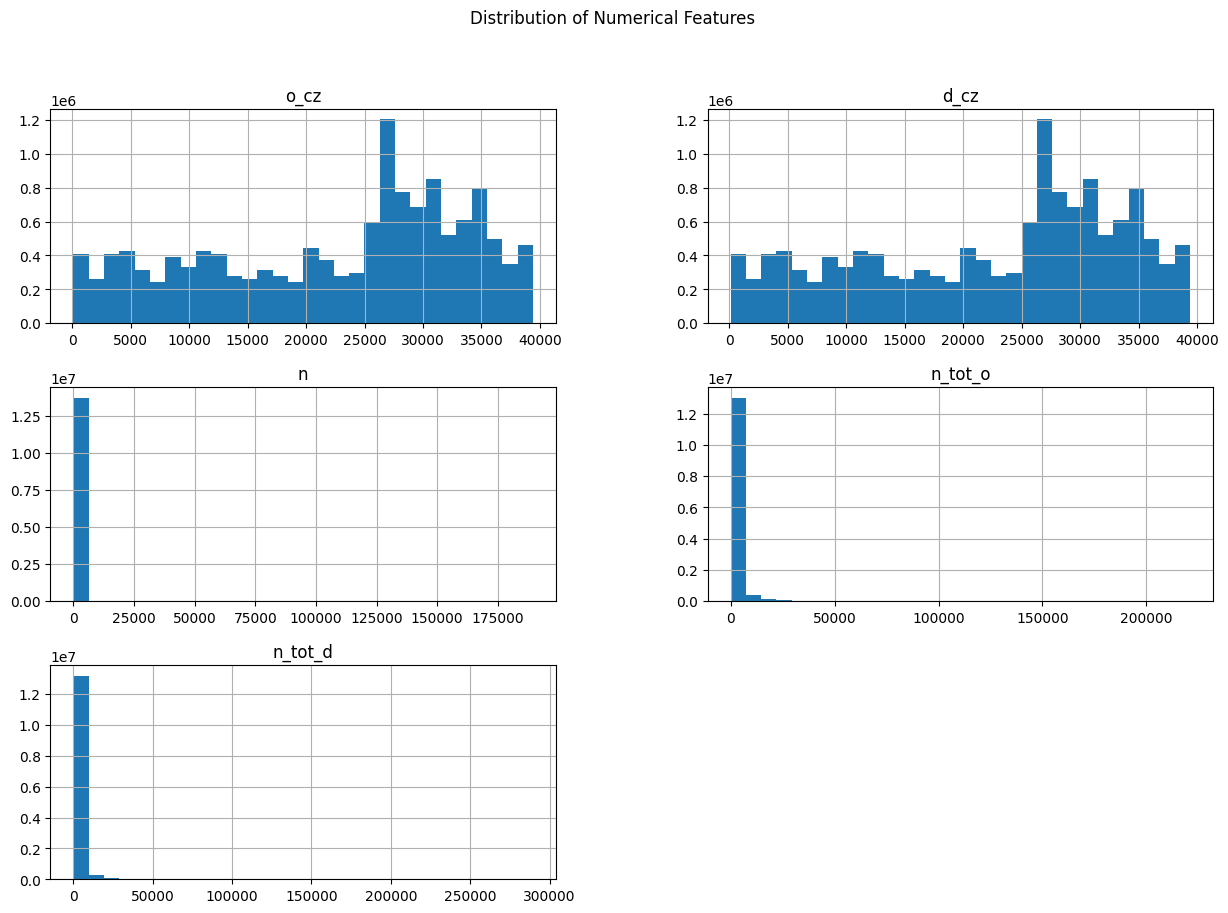


Time taken to run the code: 39.47 seconds


In [ ]:
start_time = time.time()
num_cols = ['o_cz', 'd_cz', 'n', 'n_tot_o', 'n_tot_d']
df[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time

print("\nTime taken to run the code: {:.2f} seconds".format(elapsed_time))

Mean for the total number of individuals who live in destination d. Generated by summing n across o_cz for each d_cz: 1696.87
CPU times: user 1.39 s, sys: 147 ms, total: 1.54 s
Wall time: 3.75 s


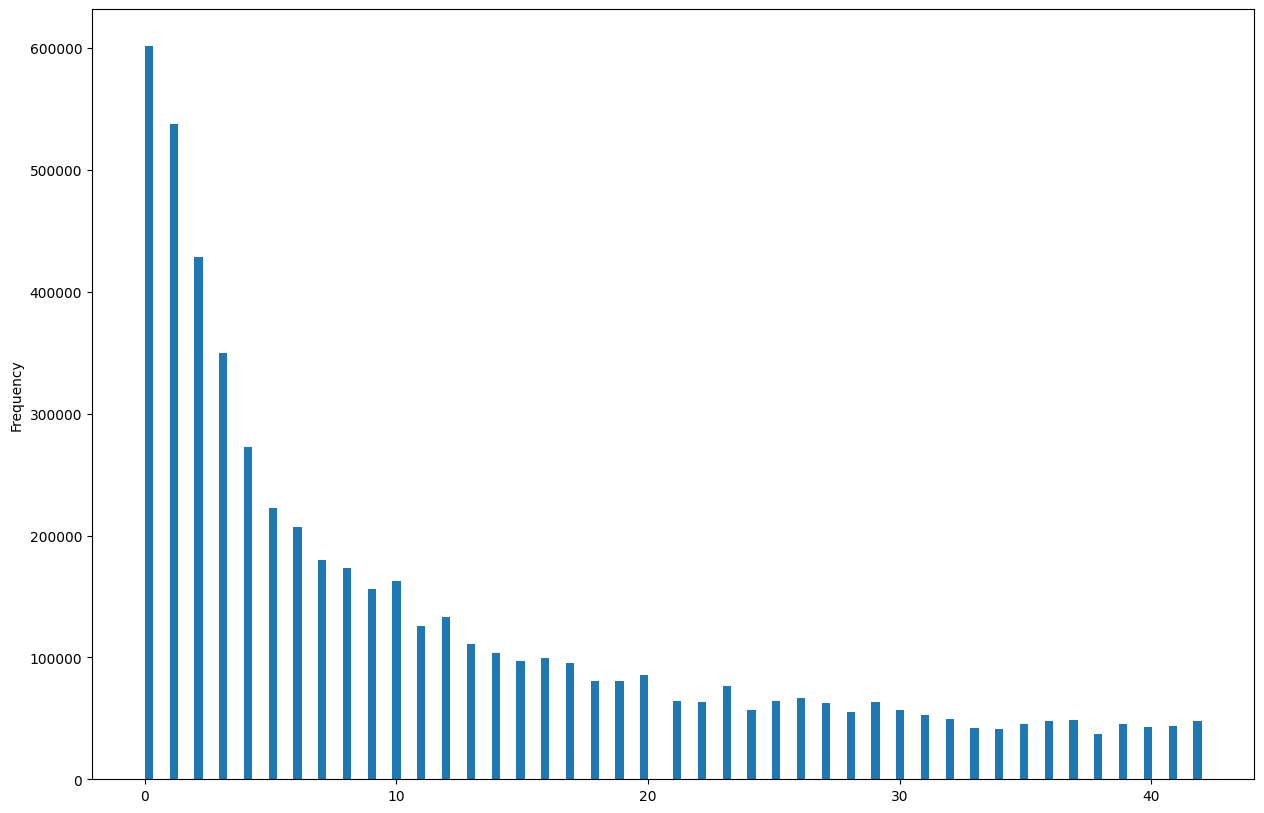

In [21]:
# Calculate the mean of the total number of individuals who live in destination d
mean_total_destination_d = df['n_tot_d'].mean()
print(f'Mean for the total number of individuals who live in destination d. Generated by summing n across o_cz for each d_cz: {mean_total_destination_d:.2f}')

# Plot a histogram of the total number of individuals who live in destination d
%time df['n_tot_d'].plot(kind='hist', bins=128, figsize=(15, 10), range=[0, 42])
plt.show()


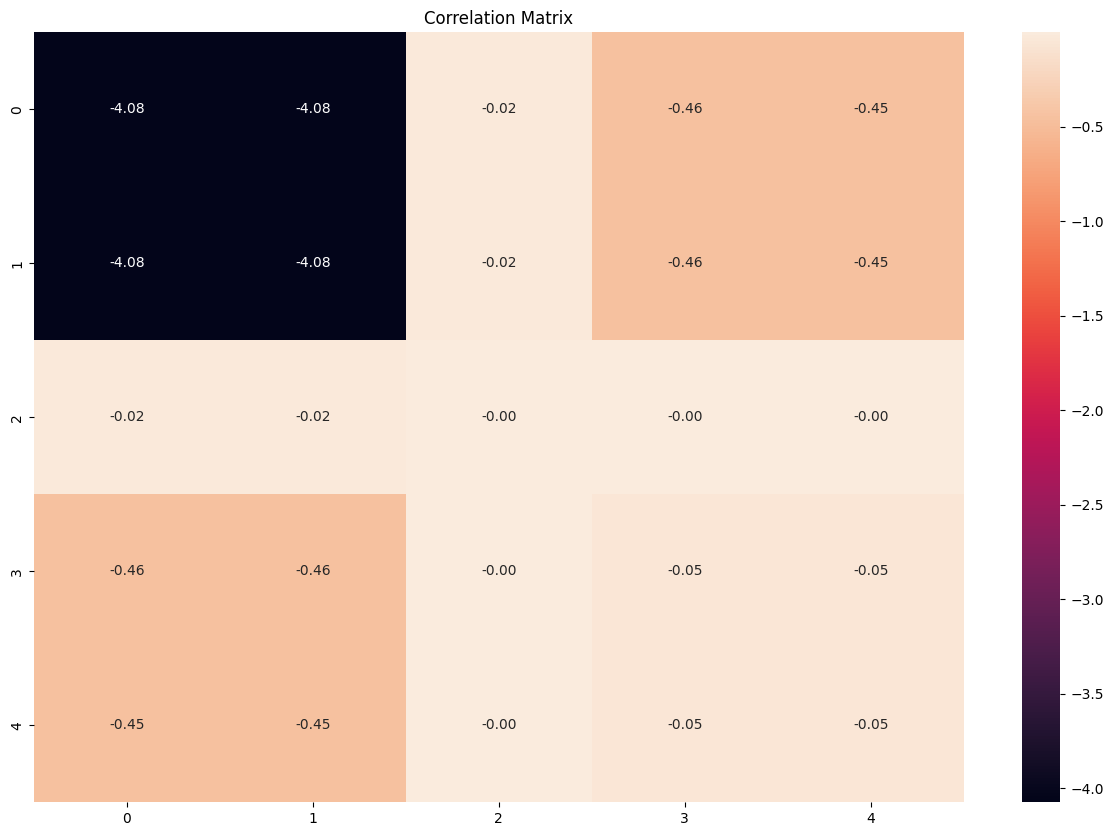

In [ ]:
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number])

# Get the correlation matrix
corr = numeric_cols.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
%time plt.show()

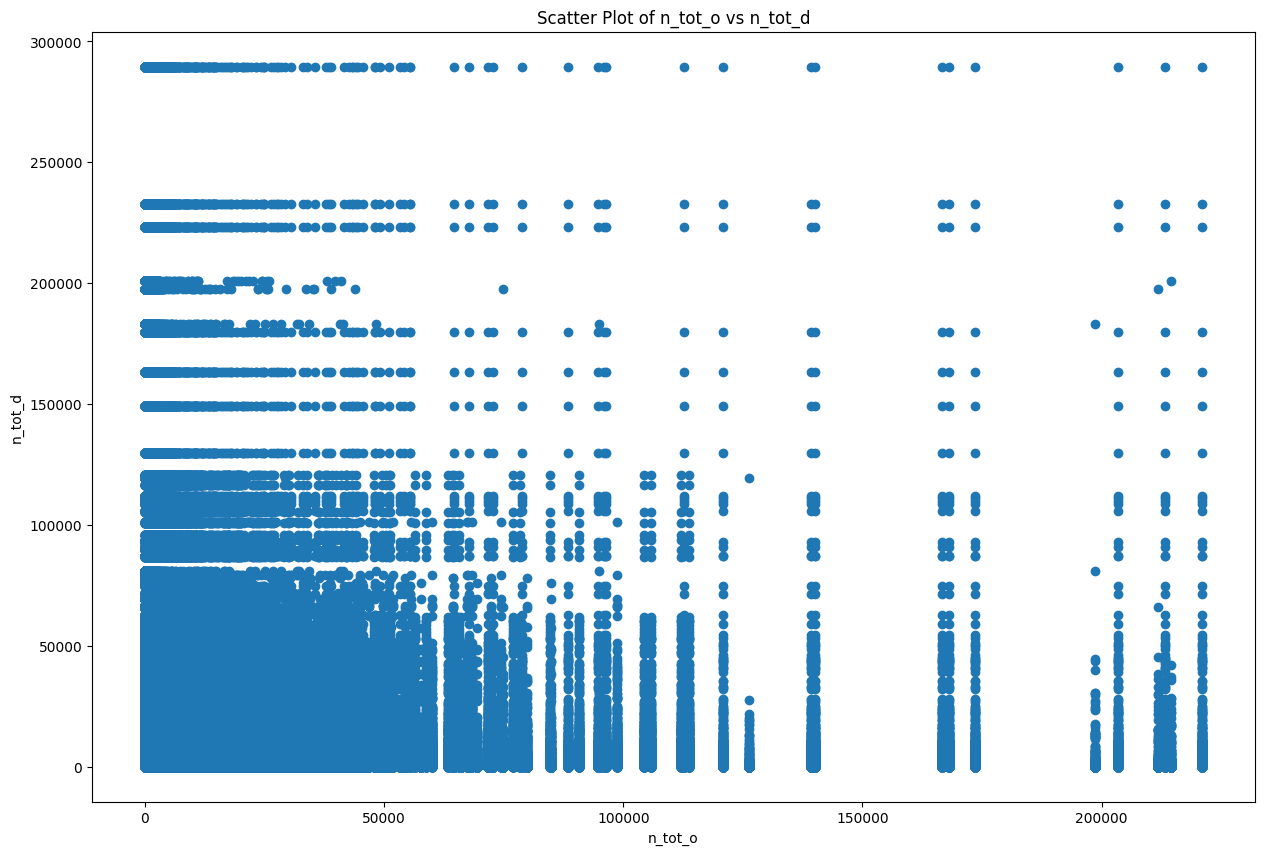

In [ ]:
# Scatter Plot of n_tot_o vs n_tot_d

plt.figure(figsize=(15, 10))
plt.scatter(df['n_tot_o'], df['n_tot_d'])
plt.title('Scatter Plot of n_tot_o vs n_tot_d')
plt.xlabel('n_tot_o')
plt.ylabel('n_tot_d')
plt.show()


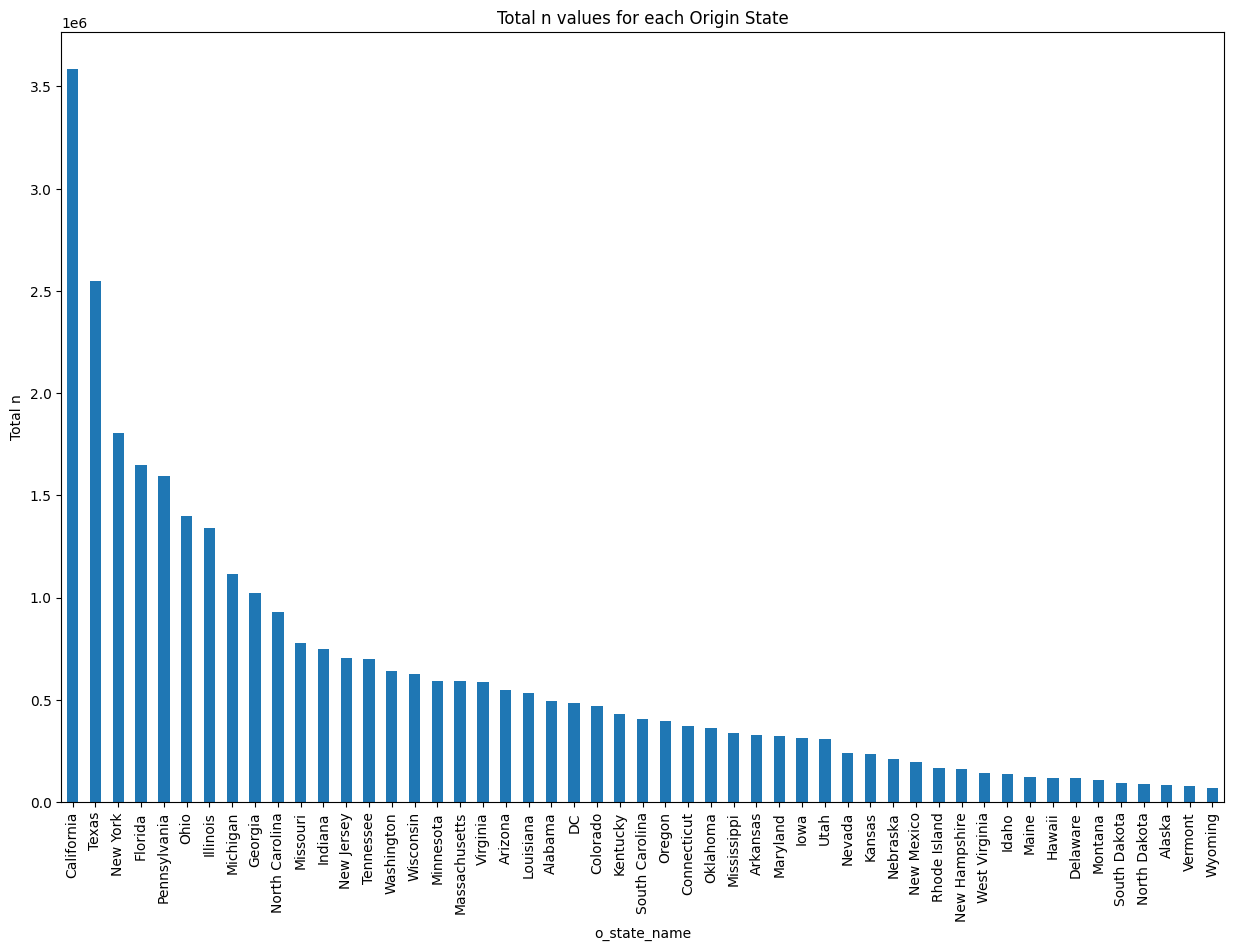

In [ ]:
# Bar Plot of n values for each o_state_name

df.groupby('o_state_name')['n'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15, 10))
plt.title('Total n values for each Origin State')
plt.ylabel('Total n')
plt.show()

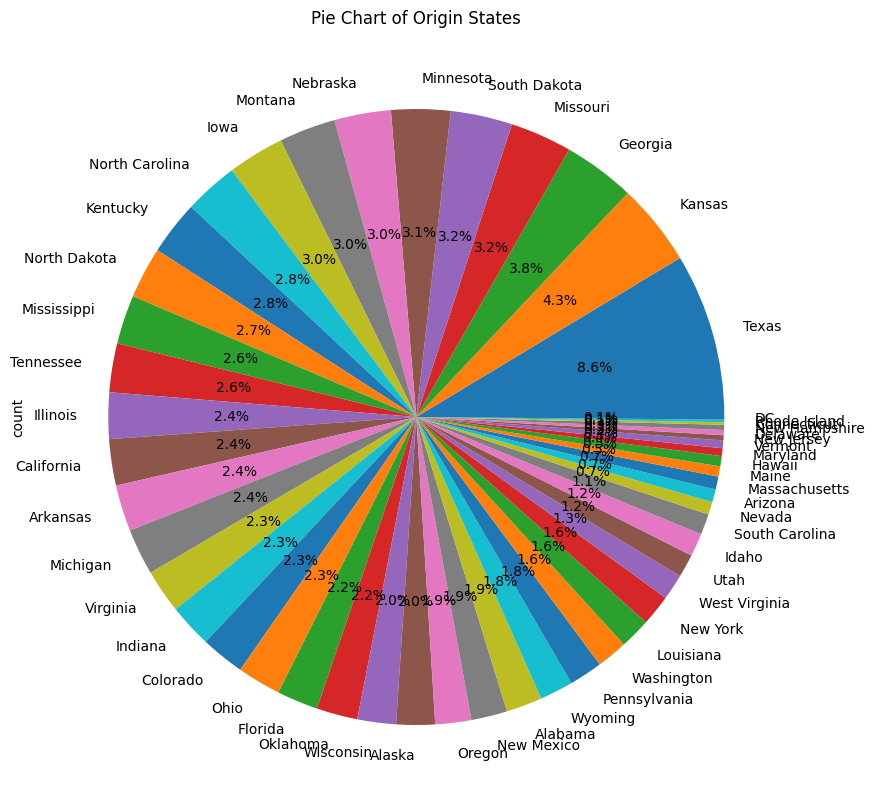

In [ ]:
# Pie Chart of o_state_name

df['o_state_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(15, 10))
plt.title('Pie Chart of Origin States')
plt.show()

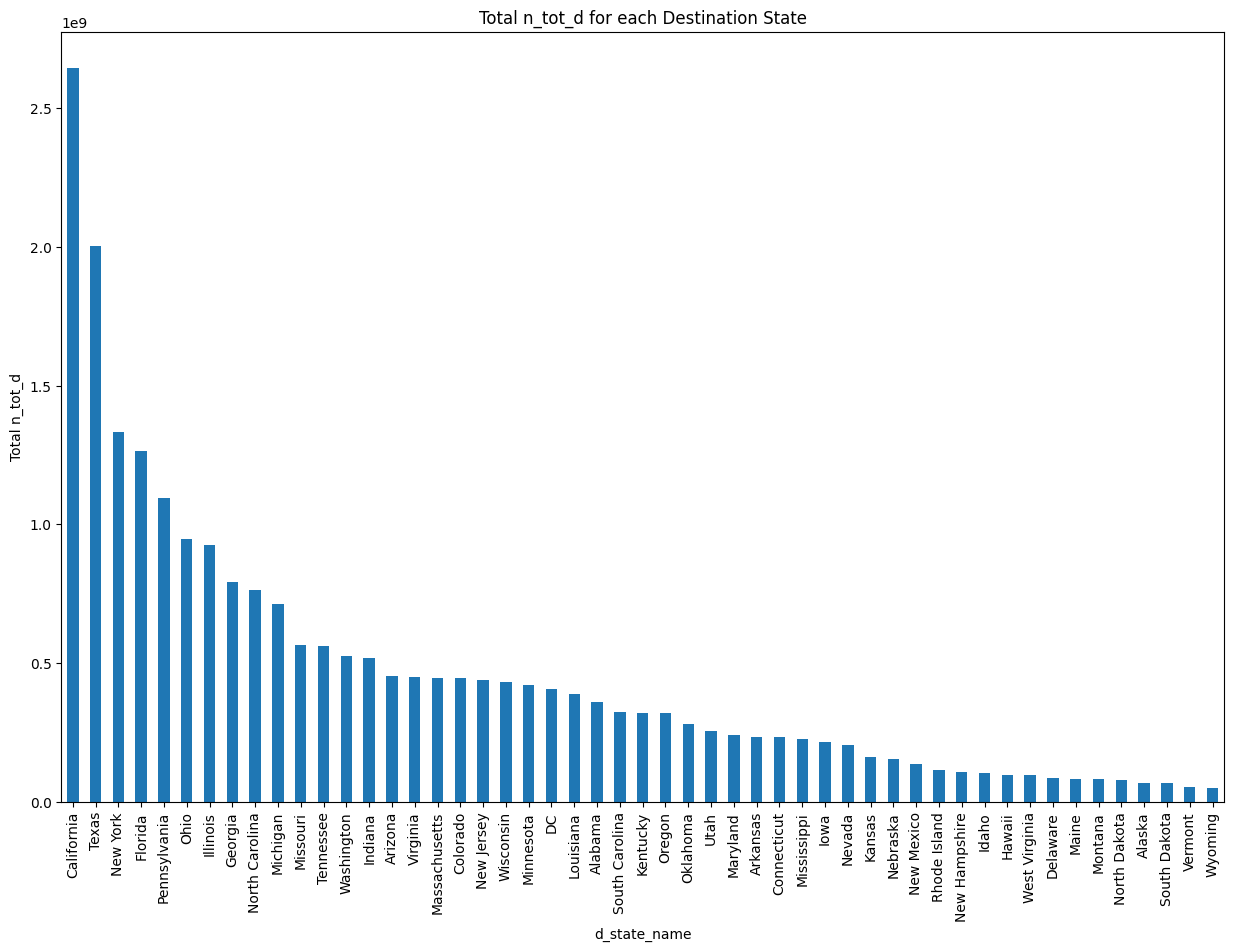

In [ ]:
# Bar Plot of n_tot_d for each d_state_name

df.groupby('d_state_name')['n_tot_d'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15, 10))
plt.title('Total n_tot_d for each Destination State')
plt.ylabel('Total n_tot_d')
plt.show()